#  PRICE PREDICTION OF HOUSE USING REGRESSION TECHNIQUES

#### Import  and load all the libraries
     1.pandas for data manipulation and analysis. it offers data structures and operations for manipulating numerical tables
     2.NumPy contains a multi-dimensional array and matrix data structures. It can be utilised to perform a number 
       of mathematical operations on arrays such as trigonometric, statistical, and algebraic routines.
     3.Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing              attractive and informative statistical graphics
     4.Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

Benagluru house data set obtained from kagle

### Data Exploration Phase
      Main aim is to understand more about the data

In [2]:
#load data set into a dataframe
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head(5)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

It has 13220 data rows and 9 colums aur features 
#### price is the dependent variable all else are the features or independent variable

### Information about coluns

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


### NULL VALUES
### more no of null values in a column indicate importance of that column is less

In [5]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

###  null values in our Dataset
    

###  visualization of our columns in regards with price

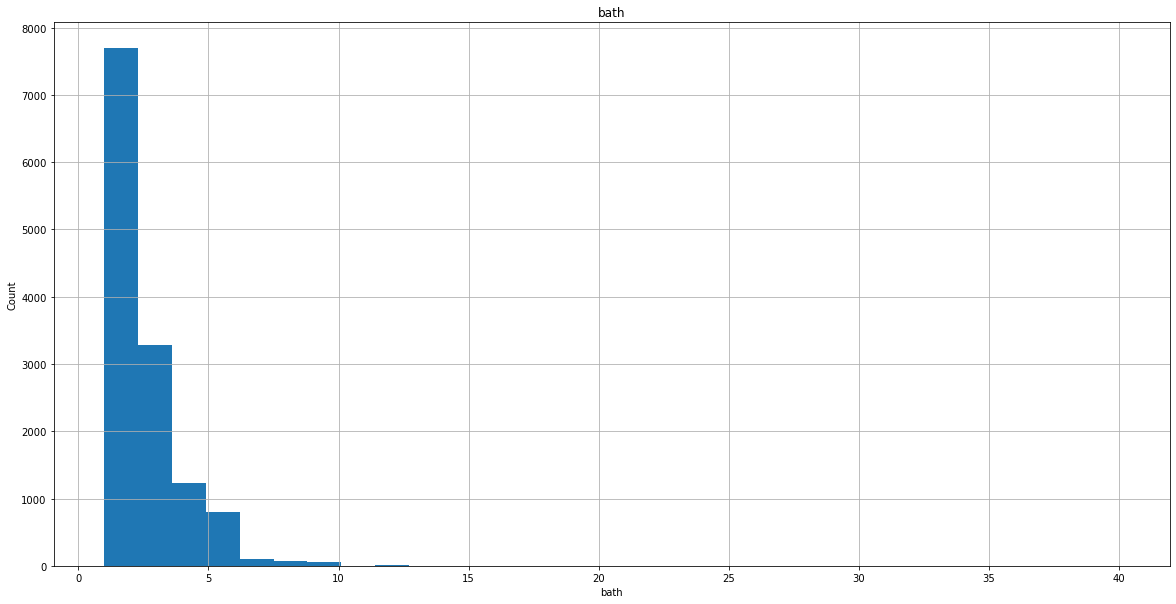

In [6]:
df1['bath'].hist(bins=30)
plt.xlabel('bath')
plt.ylabel("Count")
plt.title('bath')
plt.show()

range of bath in our dataset

In [7]:
df1['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

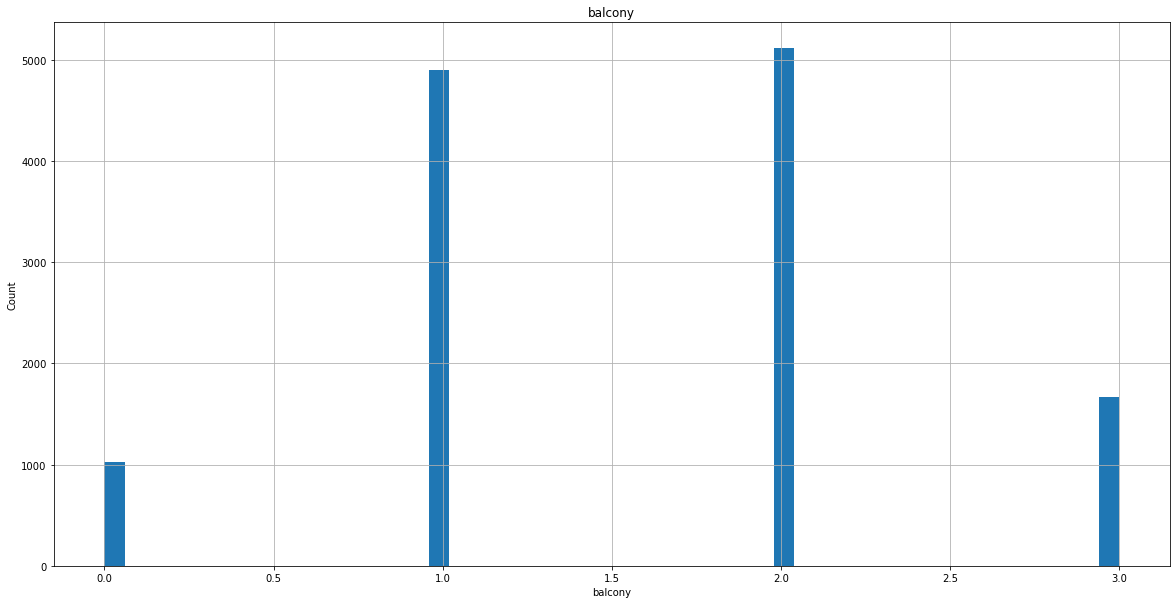

In [8]:
df1['balcony'].hist(bins=50)
plt.xlabel('balcony')
plt.ylabel("Count")
plt.title('balcony')
plt.show()

In [9]:
df1['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

### histogram of price coulmn 
### we see it is right skewed

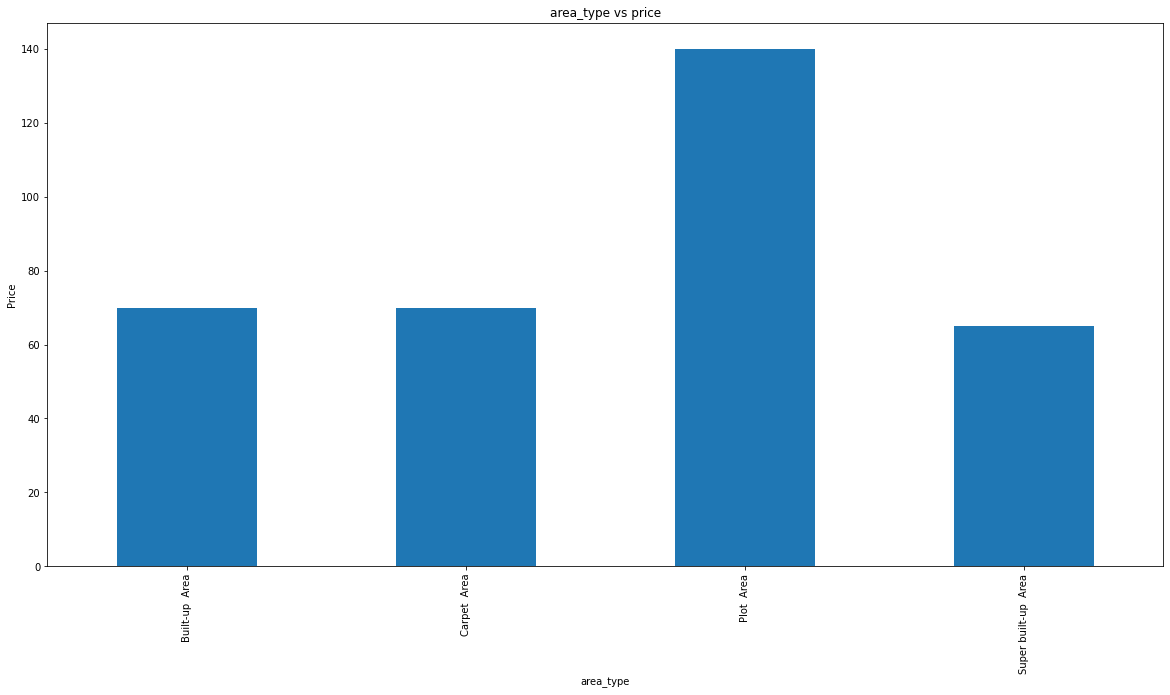

In [10]:
df1.groupby('area_type')['price'].median().plot.bar()
plt.xlabel('area_type')
plt.ylabel('Price')
plt.title('area_type vs price')
plt.show()

## Handling null values

### In balcony column we handle the null values by filling in the median values

In [11]:
df1['balcony'].isnull().sum()

609

In [12]:
df1['balcony'].median()

2.0

In [13]:
df1["balcony"].fillna(df1['balcony'].median(), inplace = True) 


In [14]:
df1['balcony'].isnull().sum()

0

In [15]:
df1['bath'].median()

2.0

In [16]:
df1["bath"].fillna(df1['bath'].median(), inplace = True) 

In [17]:
df1['bath'].isnull().sum()

0

In [18]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

####     society column has lots of missing values, 41.3 %.
####      Maybe all these house doesn't belong to any society.
####     Or, because of some data gathering problem these records has missing society value.
####     Or, it could be both of them.
####     we drop the column 

In [19]:
df2=df1.drop('society',axis=1)
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [20]:
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

### and for small left null values we drop them

In [21]:
df3=df2.dropna()
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [22]:
df3.isnull().sum()


area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

###  Feature Engineering

In [23]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
df3['bhk']=df3['size'].apply(lambda x: int( x.split(' ')[0]))

c:\users\animesh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df3.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [26]:
#created new colums without redundancy so droping old one
df4=df3.drop(['size'],axis=1)
df4.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


#### here we notice square feet has object data type so we apply feature engg to it

In [28]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
def check_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [30]:
df4[~df4['total_sqft'].apply(check_float)].head(10)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [31]:
def convert(x):
    token=x.split('-')
    if len(token) == 2:
        return ( (float(token[0]) + float(token[1])) / 2)
    try:
        return float(x)
    except:
        return None

In [32]:
df5=df4.copy();

In [33]:
df5['total_sqft'] = df5['total_sqft'].apply(convert)

In [34]:
df5.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
total_sqft                      2475
bath                               4
balcony                            0
price                            186
bhk                                4
Name: 30, dtype: object

In [35]:
df5.isnull().sum()

area_type        0
availability     0
location         0
total_sqft      46
bath             0
balcony          0
price            0
bhk              0
dtype: int64

In [36]:
df5 = df5.dropna()
df5.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

### we convert the categorical data type to numerical data type

In [37]:
replace_area_type = {'Super built-up  Area': 0, 'Built-up  Area': 1, 'Plot  Area': 2, 'Carpet  Area': 3}
df5['area_type'] = df5.area_type.map(replace_area_type)

In [38]:
df5.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,0,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,2,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,1,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,0,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,0,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [39]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13257 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13257 non-null  int64  
 1   availability  13257 non-null  object 
 2   location      13257 non-null  object 
 3   total_sqft    13257 non-null  float64
 4   bath          13257 non-null  float64
 5   balcony       13257 non-null  float64
 6   price         13257 non-null  float64
 7   bhk           13257 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 828.6+ KB


### after cleaning the data we visulaize the trend of sqft with price

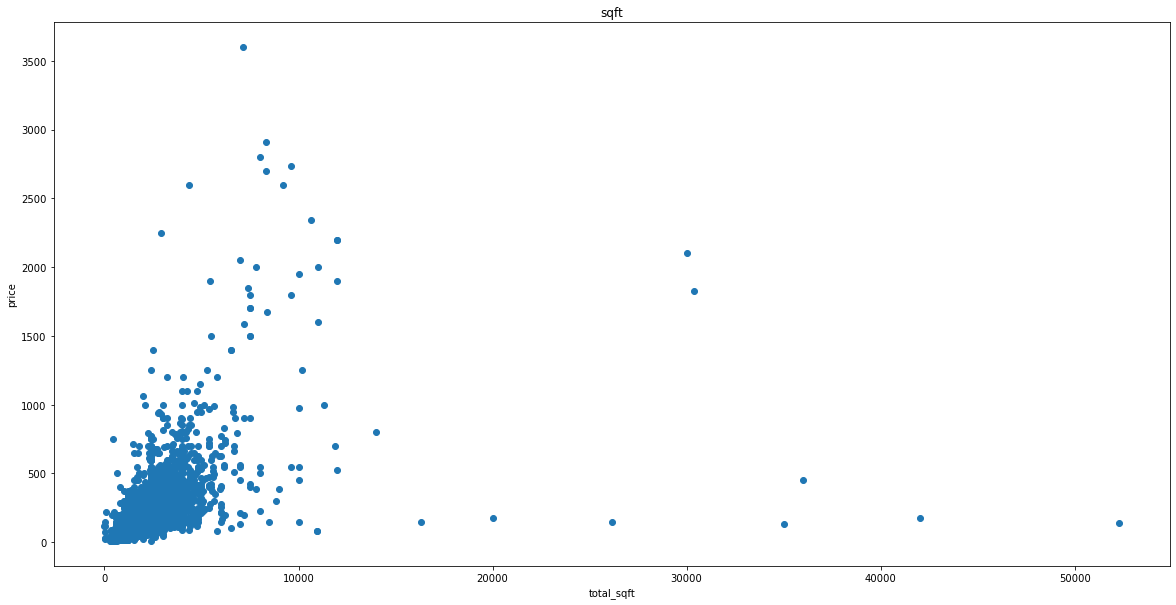

In [40]:
plt.scatter(df5['total_sqft'],df5['price'])
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('sqft')
plt.show()

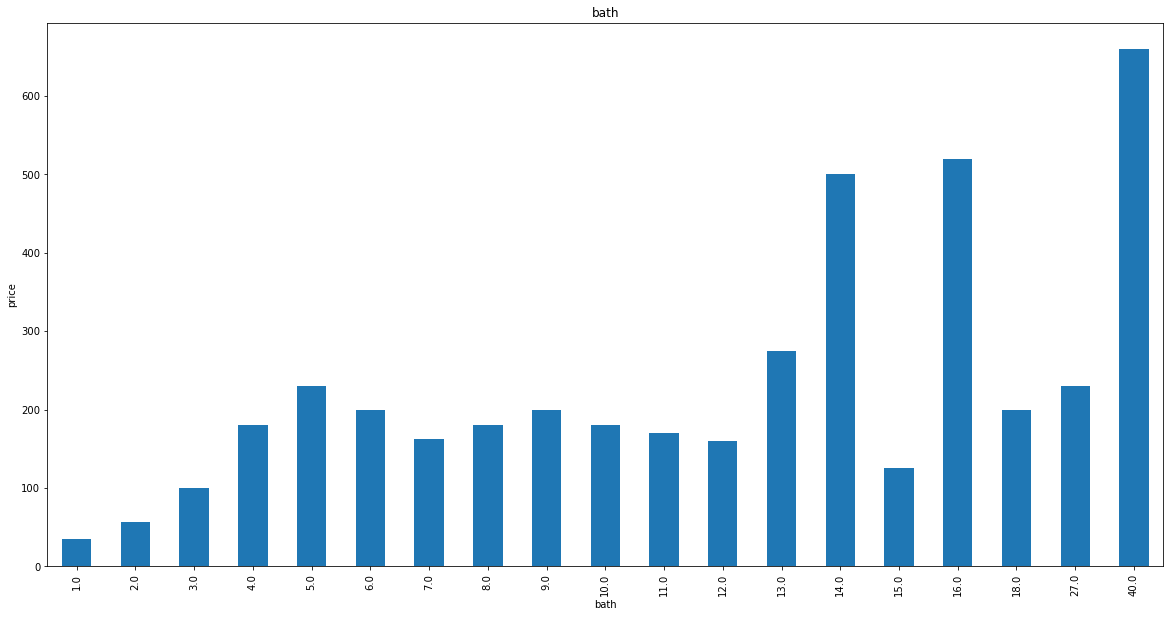

In [41]:
df5.groupby('bath')['price'].median().plot.bar()
plt.xlabel('bath')
plt.ylabel('price')
plt.title('bath')
plt.show()

In [42]:
df5['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

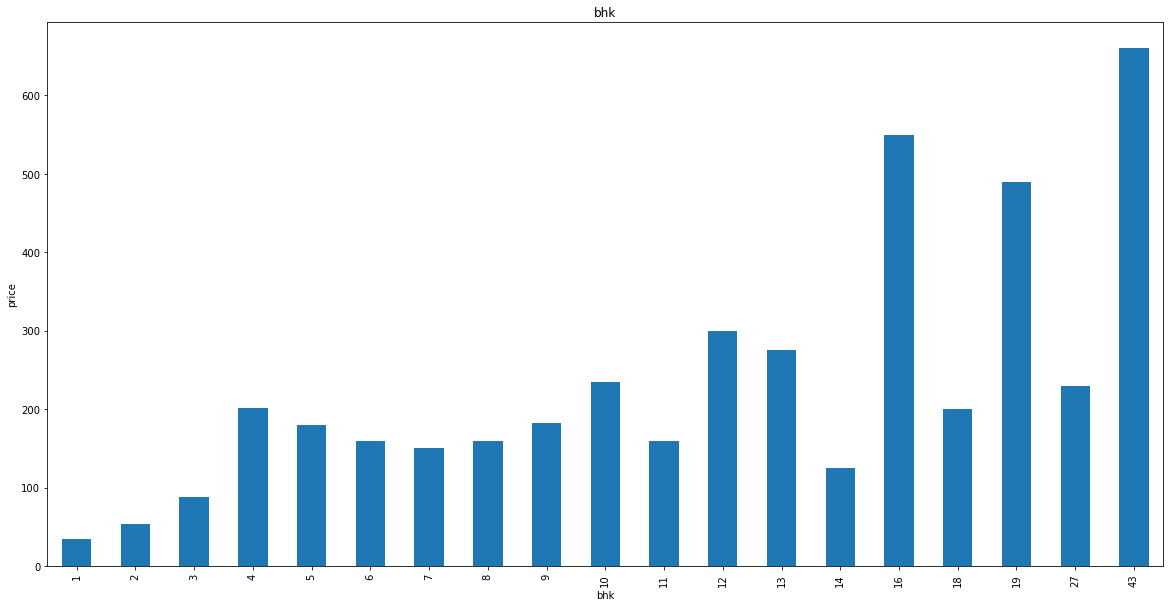

In [43]:
df5.groupby('bhk')['price'].median().plot.bar()
plt.xlabel('bhk')
plt.ylabel('price')
plt.title('bhk')
plt.show()

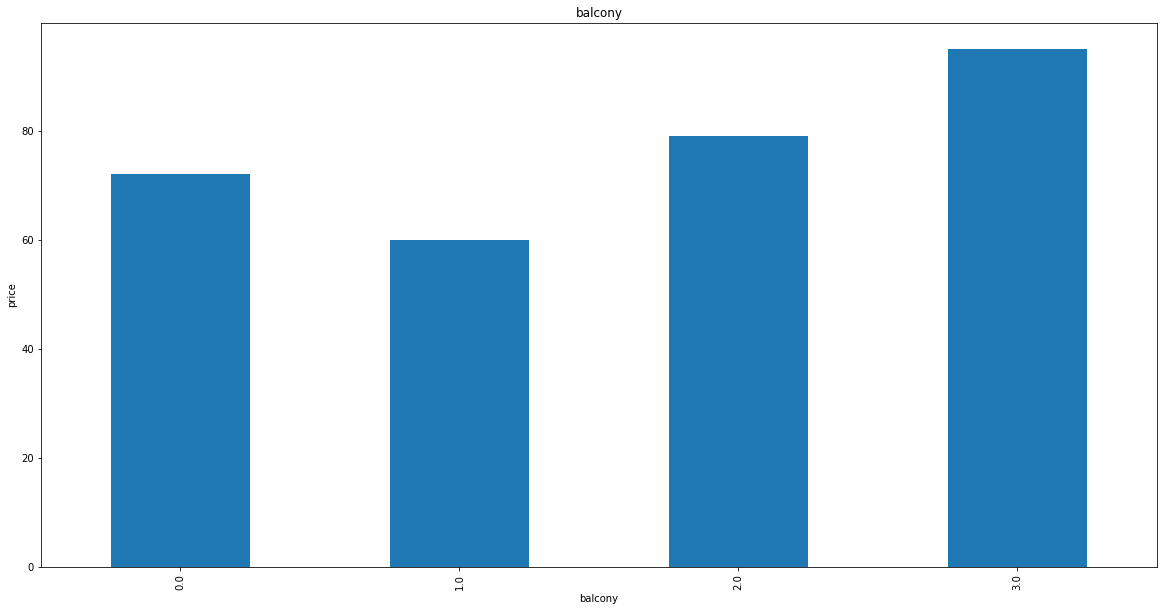

In [44]:
df5.groupby('balcony')['price'].median().plot.bar()
plt.xlabel('balcony')
plt.ylabel('price')
plt.title('balcony')
plt.show()

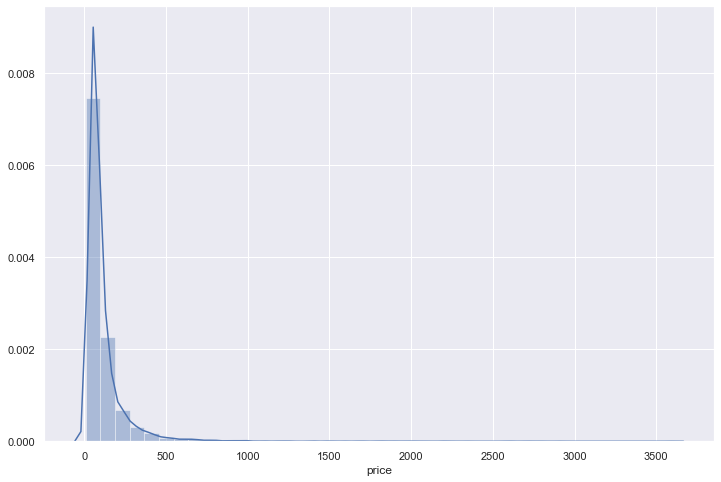

In [45]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df1['price'], bins=40)
plt.show()

#### Distribution of price is highly righ skewed.
#### Most of the house price lies below 500 lakhs.

catgerocial to numerical data type

In [46]:
df5['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [47]:
def replace_availabilty(my_string):
    if my_string == 'Ready To Move':
        return 0
    else:
        return 2

In [48]:
df5['availability'] = df5.availability.apply(replace_availabilty)

In [49]:
df5.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,0,2,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,2,0,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,1,0,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,0,0,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,0,0,Kothanur,1200.0,2.0,1.0,51.00,2


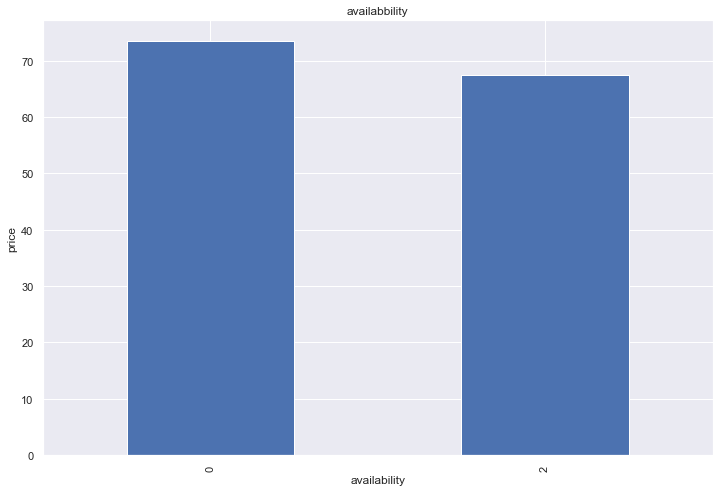

In [50]:
df5.groupby('availability')['price'].median().plot.bar()
plt.xlabel('availability')
plt.ylabel('price')
plt.title('availabbility')
plt.show()

### Dimensionality Reduction
#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number    of locations

In [51]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                              537
Sarjapur  Road                          397
Electronic City                         302
Kanakpura Road                          271
Thanisandra                             233
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
 Anekal                                   1
Name: location, Length: 1298, dtype: int64

### Dimensionality Reduction
#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [52]:
len(location_stats[location_stats<=10])

1058

In [53]:
location_stats_lessthan_10 = location_stats[location_stats<=10]
location_stats_lessthan_10

location
Basapura                                10
Naganathapura                           10
Thyagaraja Nagar                        10
Gunjur Palya                            10
Sadashiva Nagar                         10
                                        ..
Kodanda Reddy Layout                     1
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
 Anekal                                  1
Name: location, Length: 1058, dtype: int64

In [54]:
len(df5.location.unique())

1298

In [55]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x )
len(df5.location.unique())

241

In [56]:
df5.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,0,2,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,2,0,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,1,0,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,0,0,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,0,0,Kothanur,1200.0,2.0,1.0,51.00,2


In [57]:
df5.shape

(13257, 8)

### Outlier Removal Using Business Logic
#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [58]:
df5[df5.total_sqft/df5.bhk<300].shape

(744, 8)

In [59]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12513, 8)

In [60]:
df6['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 14., 12., 16., 10.,
       13.])

In [61]:
df6.describe()

,area_type,availability,total_sqft,bath,balcony,price,bhk
count,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000
mean,0.424918,0.428994,1593.745883,2.560217,1.604092,111.400362,2.651642
std,0.708784,0.820979,1261.402072,1.078477,0.796646,152.104715,0.977059
min,0.000000,0.000000,300.000000,1.000000,0.000000,9.000000,1.000000
25%,0.000000,0.000000,1116.000000,2.000000,1.000000,49.000000,2.000000
50%,0.000000,0.000000,1300.000000,2.000000,2.000000,70.000000,3.000000
75%,1.000000,0.000000,1700.000000,3.000000,2.000000,115.000000,3.000000
max,3.000000,2.000000,52272.000000,16.000000,3.000000,3600.000000,16.000000


#### Add new feature called price per square feet for futher outlier removal

In [62]:
df6['price_per_sqft'] = df6['price']*100000/df6['total_sqft']
df6.head()


c:\users\animesh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,0,2,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,2,0,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,1,0,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,0,0,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,0,0,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [63]:
df6.shape

(12513, 9)

In [64]:
df6['price'].describe()

count    12513.000000
mean       111.400362
std        152.104715
min          9.000000
25%         49.000000
50%         70.000000
75%        115.000000
max       3600.000000
Name: price, dtype: float64

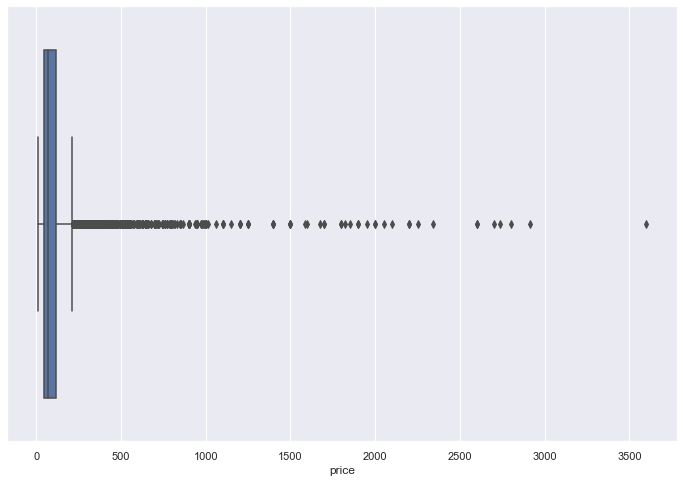

In [65]:
sns.boxplot(x=df6['price'])

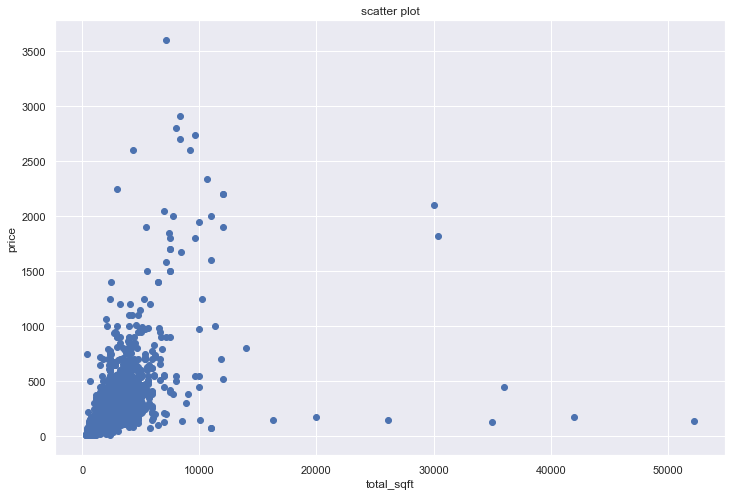

In [66]:
plt.scatter(df6['total_sqft'],df6['price'])
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('scatter plot')
plt.show()

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [67]:
def remove_price_outlier(df_in):
    df_out = pd.DataFrame()
    for key, subdf in df_in.groupby('location'):
        avg_price = np.mean(subdf.price_per_sqft)
        std_price = np.std(subdf.price_per_sqft)
        # data without outliers: 
        reduced_df = subdf[(subdf.price_per_sqft>(avg_price-std_price)) & (subdf.price_per_sqft<=(avg_price+std_price))]
        df_out =pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df7 = remove_price_outlier(df6)
df7.shape

(10290, 9)

In [68]:
df7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [69]:
df7[df7.bath>10]

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
5300,0,0,Neeladri Nagar,4000.0,12.0,2.0,160.0,10,4000.000000
8522,0,0,other,12000.0,12.0,2.0,525.0,10,4375.000000
8611,0,0,other,10000.0,16.0,2.0,550.0,16,5500.000000
9351,0,0,other,6000.0,12.0,2.0,150.0,11,2500.000000
9683,0,0,other,5425.0,13.0,0.0,275.0,13,5069.124424


####  It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [70]:
df7[df7.bath>df7.bhk+2]

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1645,1,0,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5261,1,0,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429
6739,0,0,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8446,0,0,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [71]:
df8=df7.copy()

In [72]:
df9=df8[df8.bath<df8.bhk+2]

In [73]:
df9.shape

(10196, 9)

In [74]:
df9.describe()

,area_type,availability,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,10196.000000,10196.000000,10196.000000,10196.000000,10196.000000,10196.000000,10196.000000,10196.000000
mean,0.354649,0.425069,1488.548877,2.438211,1.607003,89.393424,2.561397,5637.222259
std,0.640744,0.818242,846.468329,0.912991,0.785490,81.872524,0.884755,2238.016507
min,0.000000,0.000000,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,0.000000,0.000000,1105.000000,2.000000,1.000000,48.785000,2.000000,4237.918216
50%,0.000000,0.000000,1280.000000,2.000000,2.000000,66.705000,2.000000,5166.149068
75%,1.000000,0.000000,1640.000000,3.000000,2.000000,99.262500,3.000000,6400.000000
max,3.000000,2.000000,30400.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922



#### Use One Hot Encoding For Location

In [75]:
dummies = pd.get_dummies(df9.location)
dummies.head(10)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,Devarachikkanahalli,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,2,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509,1,...,0,0,0,0,0,0,0,0,0,0



### Build a Model Now...

In [77]:
X=df10.drop(['price','price_per_sqft','location'],axis='columns')
X.head()

,area_type,availability,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,2,1250.0,2.0,3.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1250.0,2.0,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1200.0,2.0,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1170.0,2.0,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1425.0,2.0,2.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
Y=df10.price
Y.head()

0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8156, 246)
(2040, 246)
(8156,)
(2040,)


In [80]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(X_train, Y_train)
lin_model.score(X_test, Y_test)

0.8483032790645954

### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.82714385, 0.84788191, 0.80862796, 0.79623113, 0.80883159])

In [82]:
ypred = lin_model.predict(X_test)

Text(0, 0.5, 'Actual Price')

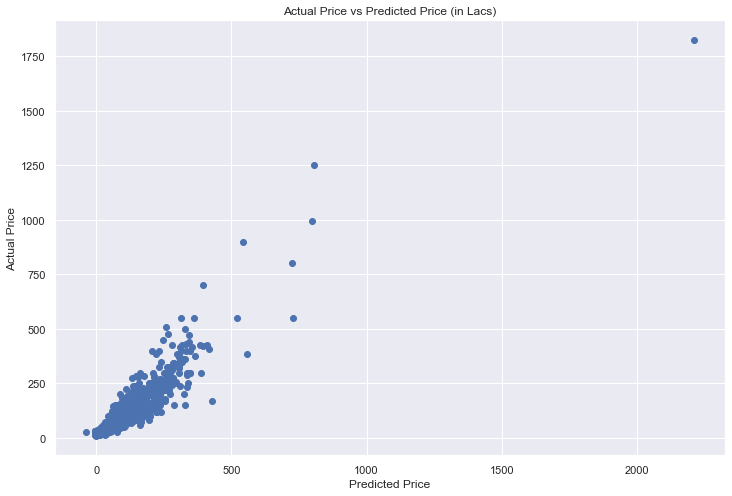

In [83]:
plt.scatter(ypred, Y_test)
plt.title('Actual Price vs Predicted Price (in Lacs)')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

In [84]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=2)
rr.fit(X_train, Y_train) 
rr.score(X_test, Y_test)

0.8368861911094678

In [85]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(Ridge(), X, Y, cv=cv)

array([0.82703151, 0.84344971, 0.80971598, 0.79606166, 0.80935845])

In [86]:
ypred = rr.predict(X_test)

Text(0, 0.5, 'Actual Price')

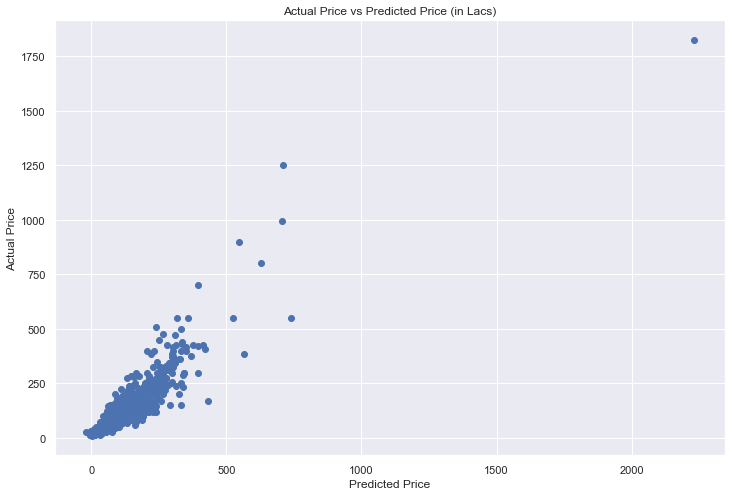

In [87]:
plt.scatter(ypred, Y_test)
plt.title('Actual Price vs Predicted Price (in Lacs)')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

In [88]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train) 
rr.score(X_test, Y_test)
#(0.001, 0.01, 0.1, 0.5, 1, 2, 10)


0.8482536690954904

In [89]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train) 
rr.score(X_test, Y_test)
#(0.001, 0.01, 0.1, 0.5, 1, 2, 10)

0.8482536690954904

In [90]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, Y_train)
model_lasso.score(X_test, Y_test)

0.8079223356257808

In [91]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(Lasso(), X, Y, cv=cv)

array([0.73669123, 0.70986869, 0.66009156, 0.62734318, 0.70891126])

Text(0, 0.5, 'Actual Price')

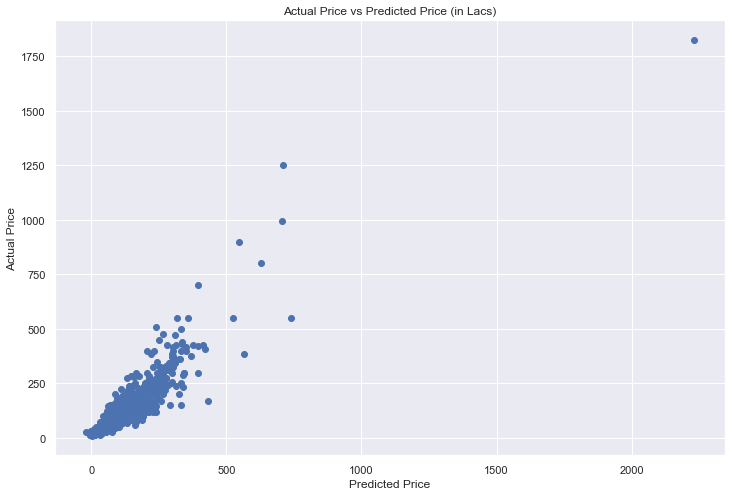

In [92]:
plt.scatter(ypred, Y_test)
plt.title('Actual Price vs Predicted Price (in Lacs)')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

pred_table = pd.DataFrame()
pred_table['Actual Price'] = Y_test
pred_table['Linear Predicted Price'] = ypred
pred_table['Ridge Predicted Price'] = Rpred
pred_table[]

In [104]:
Aprice = Y_test
Lpred = lin_model.predict(X_test)
Rpred = rr.predict(X_test)
Lpred = model_lasso.predict(X_test)
pred_table = pd.DataFrame({
    'Actual Price': Aprice,
    'Linear Predicted Price': Lpred,
    'Ridge Predicted Price': Rpred,
    'Lasso Predicted Price': Lpred
})

In [105]:
pred_table.sample(10)

,Actual Price,Linear Predicted Price,Ridge Predicted Price,Lasso Predicted Price
6389,66.00,65.075193,72.970052,65.075193
4033,70.00,60.344867,56.257484,60.344867
2544,160.00,114.054719,126.932569,114.054719
605,325.00,196.075515,230.970767,196.075515
2996,58.00,69.445342,54.408241,69.445342
7450,35.00,51.463223,50.979952,51.463223
9089,68.00,69.066405,75.385617,69.066405
5573,74.40,82.268245,76.531622,82.268245
5506,58.99,78.099935,66.834569,78.099935
6856,170.00,173.722549,211.367351,173.722549


In [116]:
plt.scatter(pred_table[~(pred_table['Actual Price'])],Aprice)

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''